In [ ]:
# ref. https://www.geeksforgeeks.org/python-classifying-handwritten-digits-with-tensorflow/
# https://codelabs.developers.google.com/codelabs/tfjs-training-classfication/index.html#5
# https://www.geeksforgeeks.org/python-tensorflow-tf-keras-layers-conv2d-function/
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
print(tf.__version__)

2.14.0


In [ ]:


mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


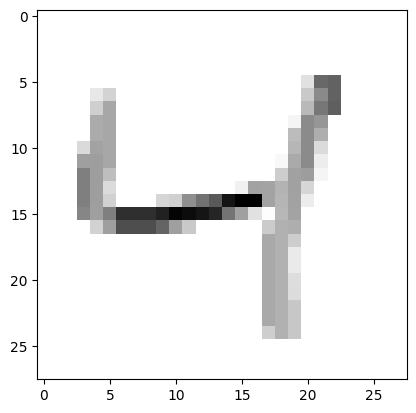

In [ ]:


def draw(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show()

draw(x_train[2])


In [ ]:
# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# #reshape

# model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy']
#               )
# model.fit(x_train,y_train,epochs=3)

model = tf.keras.models.Sequential()
image_width = 28
image_height = 28
image_channels = 1

model.add(layers.Conv2D(
    8,
    5,
    input_shape = [image_width, image_height, image_channels],
    strides = 1,
    activation = 'relu',
    kernel_initializer = 'variance_scaling'
));
model.add(layers.MaxPooling2D(pool_size = [2, 2], strides = [2, 2]));

model.add(layers.Conv2D(
    16,
    5,
    strides = 1,
    activation = 'relu',
    kernel_initializer = 'variance_scaling'
));
model.add(layers.MaxPooling2D(pool_size = [2, 2], strides = [2, 2]));

model.add(layers.Flatten());

num_output_classes = 10;
model.add(layers.Dense(
    units = num_output_classes,
    kernel_initializer = 'variance_scaling',
    activation = 'softmax'
));

optimizer = tf.optimizers.Adam();
model.compile(
    optimizer = optimizer,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
);



In [ ]:
print(
 "x_train.shape", x_train.shape,
 "y_train.shape", y_train.shape,
 "x_test.shape", x_test.shape,
 "y_test.shape", y_test.shape
)

x_train.shape (60000, 28, 28) y_train.shape (60000,) x_test.shape (10000, 28, 28) y_test.shape (10000,)


In [ ]:
# Preprocess the data (these are NumPy arrays)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=3,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/3
782/782 [==============================] - 23s 29ms/step - loss: 1.4362 - accuracy: 0.5563 - val_loss: 0.6203 - val_accuracy: 0.8302
Epoch 2/3
782/782 [==============================] - 22s 29ms/step - loss: 0.5548 - accuracy: 0.8355 - val_loss: 0.4390 - val_accuracy: 0.8719
Epoch 3/3
782/782 [==============================] - 22s 28ms/step - loss: 0.4328 - accuracy: 0.8711 - val_loss: 0.3576 - val_accuracy: 0.8954


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [ ]:


# val_loss,val_acc = model.evaluate(x_test,y_test)
# print("loss-> ",val_loss,"\nacc-> ",val_acc)


313/313 [==============================] - 2s 7ms/step
label ->  9.0
prediction ->  9


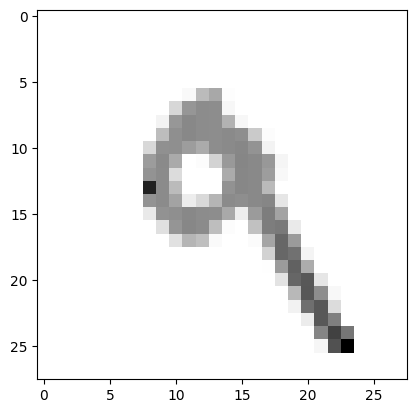

In [ ]:
index = 7
predictions=model.predict([x_test])
print('label -> ',y_test[index])
print('prediction -> ',np.argmax(predictions[index]))

draw(x_test[index])
